In [1]:
import os
import subprocess

import numpy as np
from pathlib import Path
import lossmaps as lm
import matplotlib.pyplot as plt

 If you are on SWAN and did not expect this warning, then restart and load the 'NXCals Pro' software stack.


In [2]:
path_LM_json_dir = Path('/eos/user/l/lpauwels/ht_condor_sps_tracking_results/combined_jsons/tidvg_studies/aperture_measurements/')

In [9]:
lm_paths = list(path_LM_json_dir.glob('*.json'))

In [16]:
LM_files = {
    'linear': {},
    'ripple': {}
}

for path in lm_paths:
    if 'linear' in str(path):
        delta_gap = float(path.stem.split('gap')[1].split('_')[0])
        LM_files['linear'][delta_gap] = path
    elif 'ripple' in str(path):
        delta_gap = float(path.stem.split('gap')[1].split('_')[0])
        LM_files['ripple'][delta_gap] = path

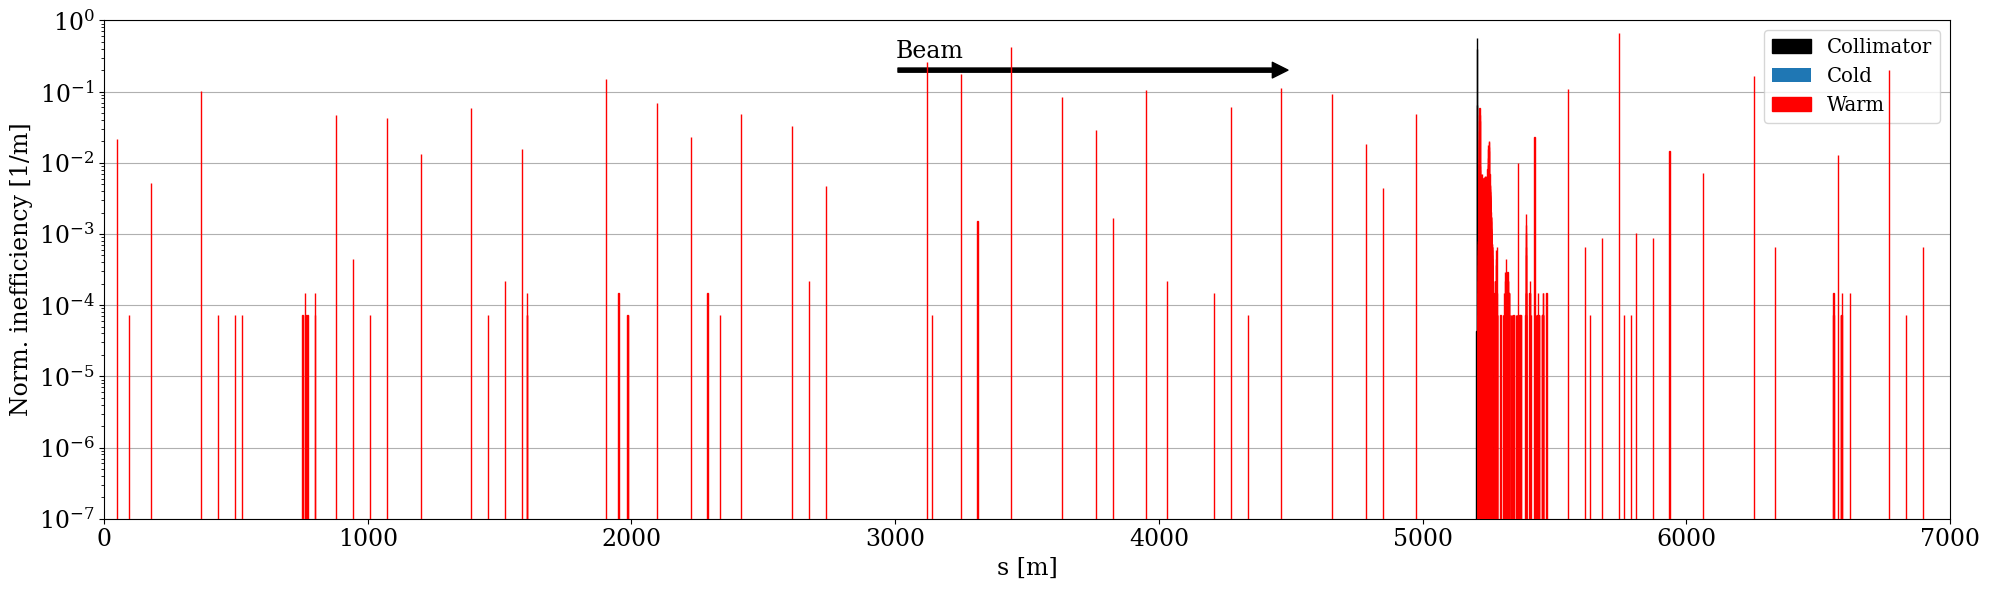

In [34]:
delta_gap = 2.2
sim_type = 'linear'
ThisLM = lm.SimulatedLossMap(lmtype=lm.LMType.B1H, machine=lm.Machine.SPS)
ThisLM.load_data_json(json_files=LM_files[sim_type][delta_gap])
fig = lm.plot_lossmap(ThisLM, xlim=(0,7000), show_zoom=False, ylim=[0.0000001,1], outfile=f'tidvg_studies/aperture_measurements/delta_gap{delta_gap}_{sim_type}.png')
plt.show()